In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Let's first load the dataset to examine its structure and contents
import pandas as pd

# Define the path to the uploaded file
file_path = "C:/Users/DELL/OneDrive/Desktop/AirQuality Dataset.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     2164 non-null   int64  
 1   City     2164 non-null   object 
 2   Country  2164 non-null   object 
 3   2023     2164 non-null   float64
 4   Jan      2164 non-null   object 
 5   Feb      2164 non-null   object 
 6   Mar      2164 non-null   object 
 7   Apr      2164 non-null   object 
 8   May      2164 non-null   object 
 9   Jun      2164 non-null   object 
 10  Jul      2164 non-null   object 
 11  Aug      2164 non-null   object 
 12  Sep      2164 non-null   object 
 13  Oct      2164 non-null   object 
 14  Nov      2164 non-null   object 
 15  Dec      2164 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 270.6+ KB


(None,
    Rank       City   Country   2023    Jan    Feb    Mar    Apr    May   Jun  \
 0     1  Begusarai     India  118.9   31.2  235.3  156.8    113  109.3    99   
 1     2   Guwahati     India  105.4  220.2  168.1  129.2  112.2   69.5  51.3   
 2     3      Delhi     India  102.1  171.8  114.3   77.4     71   67.4  42.9   
 3     4  Mullanpur     India  100.4  106.3  123.7   78.1   56.6   53.4  53.9   
 4     5     Lahore  Pakistan   99.5  143.2  117.3   73.8   52.9   52.4  46.4   
 
     Jul   Aug   Sep    Oct    Nov    Dec  
 0  63.8  61.8  71.5   61.8  210.5    285  
 1  46.6  60.2  76.7   76.4  126.9    128  
 2  35.3  34.8  39.7  106.3  255.1    210  
 3  63.2  59.7  59.6  110.4    253  201.4  
 4  39.8  42.2  53.8  125.9    251  197.5  )

In [7]:
# Converting monthly columns to numeric and handling non-numeric values
monthly_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert to numeric and coerce errors to NaN for proper handling
for col in monthly_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Check for missing values after conversion
missing_values = data.isnull().sum()

# Display the count of missing values
missing_values


Rank        0
City        0
Country     0
2023        0
Jan        87
Feb        66
Mar        33
Apr         9
May        58
Jun         6
Jul         4
Aug        11
Sep        11
Oct        31
Nov        91
Dec        51
dtype: int64

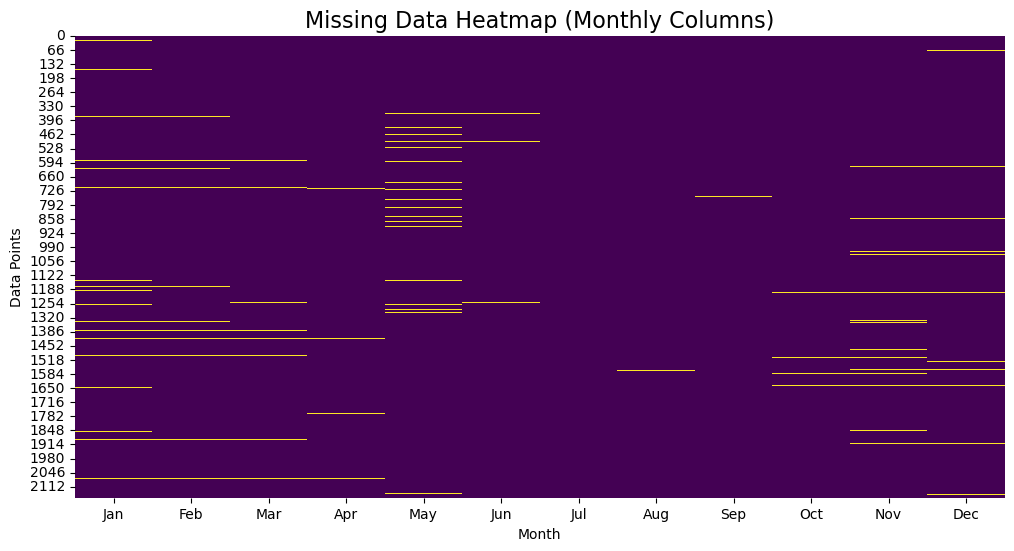

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a heatmap to visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(data[monthly_columns].isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap (Monthly Columns)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Data Points")
plt.show()


In [11]:
# Impute missing values using the median for each monthly column
for col in monthly_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Verify that there are no missing values remaining in the dataset
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation


C:\Users\DELL\AppData\Local\Temp\ipykernel_15192\2599079373.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


Rank       0
City       0
Country    0
2023       0
Jan        0
Feb        0
Mar        0
Apr        0
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
dtype: int64

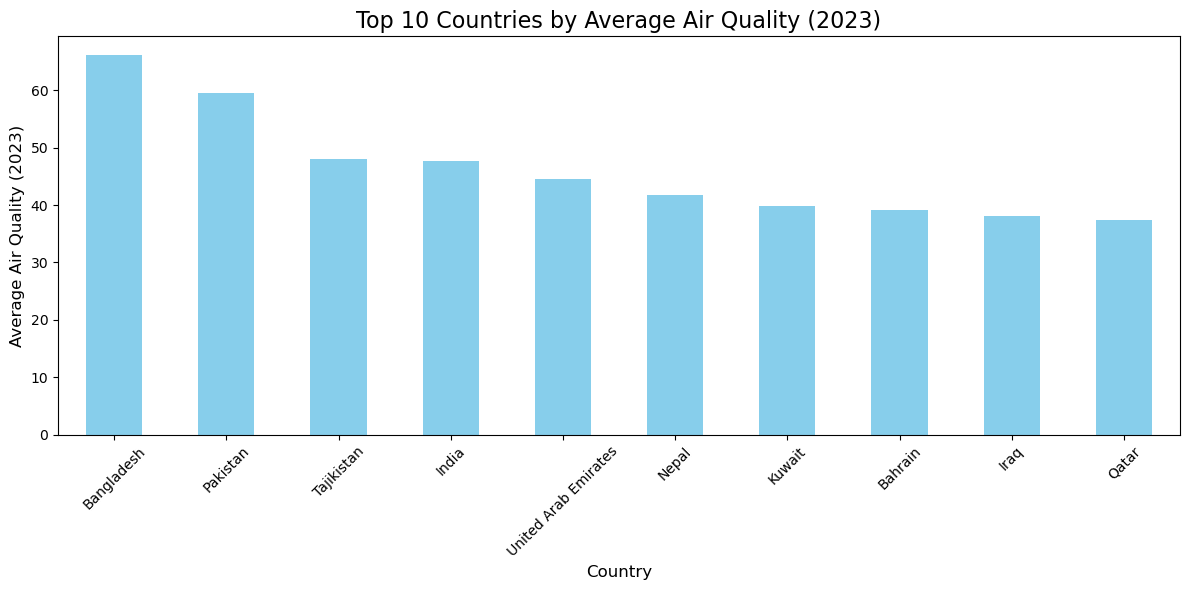

In [13]:
import matplotlib.pyplot as plt

# Bar plot: Average air quality by country (2023)
country_avg = data.groupby('Country')['2023'].mean().sort_values(ascending=False).head(10)  # Top 10 countries

plt.figure(figsize=(12, 6))
country_avg.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Average Air Quality (2023)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Air Quality (2023)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


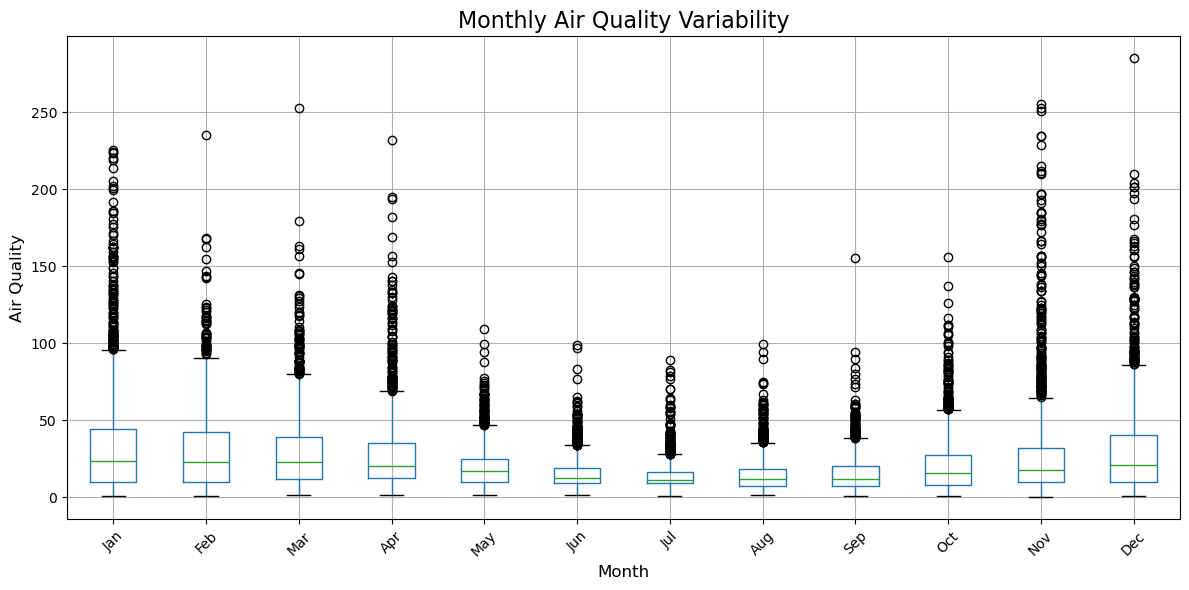

In [15]:
# Additional Plot: Box plot of monthly air quality
plt.figure(figsize=(12, 6))
data[monthly_columns].boxplot()
plt.title('Monthly Air Quality Variability', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Air Quality', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


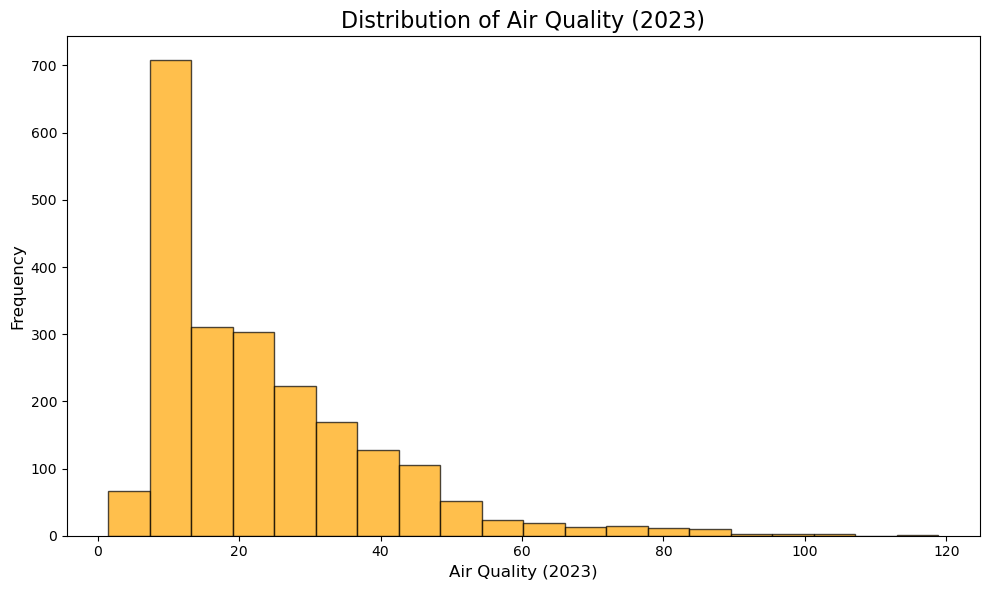

In [17]:
# Additional Plot: Histogram of 2023 air quality values
plt.figure(figsize=(10, 6))
plt.hist(data['2023'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Air Quality (2023)', fontsize=16)
plt.xlabel('Air Quality (2023)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

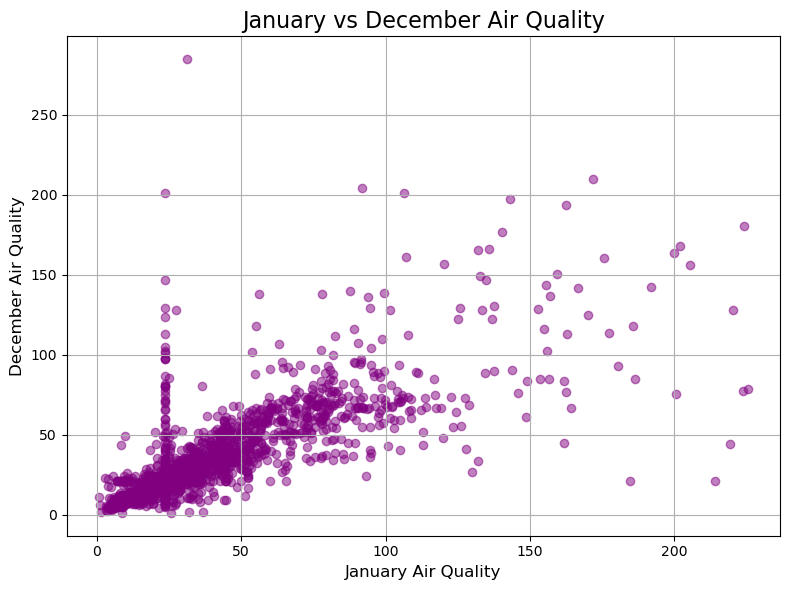

In [19]:
# Scatter plot: January vs December air quality
plt.figure(figsize=(8, 6))
plt.scatter(data['Jan'], data['Dec'], alpha=0.5, color='purple')
plt.title('January vs December Air Quality', fontsize=16)
plt.xlabel('January Air Quality', fontsize=12)
plt.ylabel('December Air Quality', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

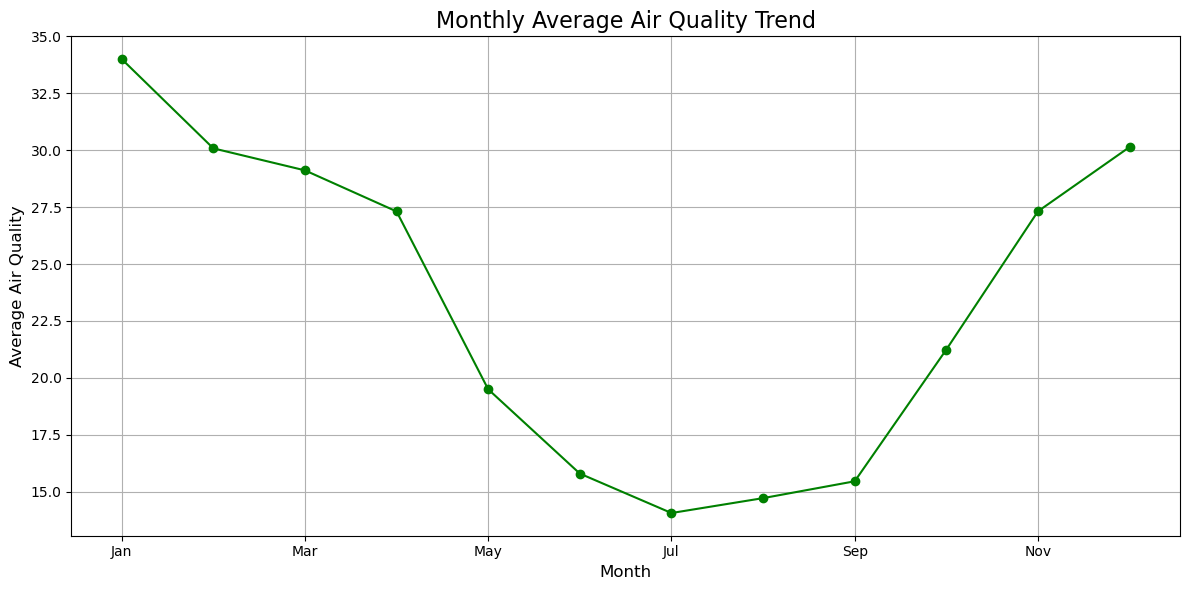

In [21]:
# Line plot: Monthly average air quality trend
monthly_avg = data[monthly_columns].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='line', marker='o', color='green')
plt.title('Monthly Average Air Quality Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Air Quality', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()